[sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### 为什么创建该文件
1. 在学习 Andrew Ng 《Deep Learning Specialization》课程中，神经网络的入门算法就是这个Logistic Regression；
    也按照Ng所给的课后作业完成编程任务
    主要是hard-code方式实现了这个算法；
    并且针对MNIST数据库中0-1两个字符进行识别验证；
2. 但是仍然觉得不够，类似这些经典的算法模型，比如sklearn等开源库都已经实现，
    所以，针对Logistic Regression 有必要去看一看sklearn如何实现与应用的；
3. sklearn的文档在应用方面也给出了很多例程与应用，
    值得去研究

### 想达到什么目标
1. 加深理解Logistic Regression 模型；
2. 一定程度上看开源代码，
3. 在更多应用例程中快速熟悉Python基本语法

### Example: [MNIST classification using multinomial logistic + L1](http://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py)

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)
# fetch_mldata??

Automatically created module for IPython interactive environment


### 读取本地MNIST数据库
其中比较注意的是，数据集行列的维度，与开源库参数的行列维度；
基本上就是转置的问题。

In [2]:
# Turn down for faster convergence
# t0 = time.time()
train_samples = 5000

mnist = pd.read_csv('../DataSets/MNIST/mnist_train.csv')
columns = ['label'] + ['pix'+str(i) for i in range(784)]
mnist.columns = columns

# mnistAB = mnist[mnist.label<=1]
mnistAB = mnist
X = mnistAB.iloc[0:train_samples, 1:].as_matrix()
Y = mnistAB.iloc[0:train_samples, :1].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
# train_X = train_X.T  # (784, 4000)
# train_Y = train_Y.T  # (1, 4000)
# test_X = test_X.T    # (784, 1000)
# test_Y = test_Y.T    # (1, 1000)

In [3]:
# Turn up tolerance for faster convergence
# clf = LogisticRegression(C=50. / train_samples,
#                          multi_class='multinomial',
#                          penalty='l1', solver='saga', tol=0.1)
clf = LogisticRegression(C=50./train_samples,
                         solver='sag',
                         multi_class='multinomial', 
                         penalty='l2', 
                         tol=.1)
# .fit(X, y)
# X.shape(n_samples, n_features)
# y.shape(n_samples,)
clf.fit(X_train, y_train.squeeze())
sparsity = np.mean(clf.coef_ == 0) * 100
# coef_.shape(n_classes, n_features)
# (1, n_features) when it is binary classification
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)
 

Sparsity with L1 penalty: 16.20%
Test score with L1 penalty: 0.8970


In [4]:
print('Training Set Accuracy: '+ str(clf.score(X_train, y_train)))
print('Training Set Accuracy: '+ str(clf.score(X_test, y_test)))

Training Set Accuracy: 0.92225
Training Set Accuracy: 0.897


In [23]:
print(clf.coef_.shape)

(10, 784)


### 权重矩阵可视化
针对10个类别的权重矩阵，明显其维度为（10， 784）。
针对每列的权重列向量，变换成28*28，并进行可视化

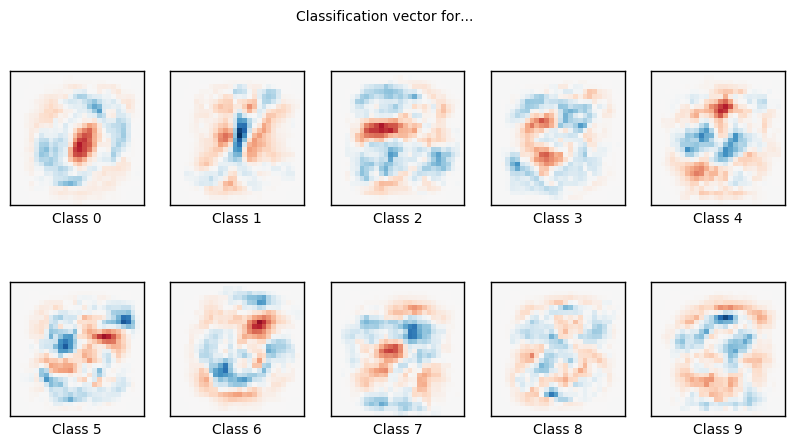

In [25]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

# run_time = time.time() - t0
# print('Example run in %.3f s' % run_time)
plt.show()

### Example: [Logistic Regression 3-class Classifier](http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py)

In [2]:
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
print('Hello world.')

Hello world.


In [3]:
print(X.shape)

(150, 2)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
print(X_train.shape)
print(y_train.shape)

(120, 2)
(120,)


In [5]:
h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(solver='sag',
                              tol=.1)
print('OK1')
# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)
print('OK2')
print('Training Set Accuracy: '+ str(logreg.score(X_train, y_train)))
print('Testing Set Accuracy: '+ str(logreg.score(X_test, y_test)))

OK1
OK2


NameError: name 'clf' is not defined

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [1]:
print(__doc__)

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = KNeighborsClassifier()
logistic = LogisticRegression(solver='sag',
                              tol=.1)
### Attention
# Here, for LogisticRegression, suitable parameters are necessary to avoid non-converge.

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

Automatically created module for IPython interactive environment
KNN score: 0.961111
LogisticRegression score: 0.938889
